# Time Series Figures

In [128]:
# load libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.lines import Line2D
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
import matplotlib.ticker as ticker


In [227]:
# specify figure dpi
plt.rcParams['figure.dpi'] = 1200 # use 1200 for more clarity

In [ ]:
# visualize a color palette (optional)
pal = sns.color_palette("rocket")
print(pal)
sns.palplot(pal)

In [119]:
# load csvs as dataframes
WQ_df = pd.read_csv('C:\\Users\\ANGELASEIBERT\\Desktop\\Hydro\\Water_Quality_Data.csv')
WQ_df
# WQ_df['Date'] = pd.to_datetime(WQ_df['Date']).dt.date


SampleID       Date   Time  Site_Information Site_Location  \
0        LC  2/24/2023  10:16  Below Confluence         Lower   
1        UC  2/24/2023  10:36  Below Confluence         Upper   
2        LM  2/24/2023  10:23      Main Channel         Lower   
3        UM  2/24/2023  10:44      Main Channel         Upper   
4       LP1  2/24/2023  10:23              Pool         Lower   
5       LP2  2/24/2023  10:24              Pool         Lower   
6       LP3  2/24/2023  10:24              Pool         Lower   
7       UP1  2/24/2023  10:43              Pool         Upper   
8       UP2  2/24/2023  10:44              Pool         Upper   
9       UP3  2/24/2023  10:44              Pool         Upper   
10       LS  2/24/2023  10:20      Side Channel         Lower   
11       US  2/24/2023  10:38      Side Channel         Upper   
12       LC   3/3/2023   9:18  Below Confluence         Lower   
13       UC   3/3/2023  10:14  Below Confluence         Upper   
14       LM   3/3/2023   9:43      Main Channel         Lower   
15       UM   3/3/2023  10:20      Main Channel         Upper   
16      LP1   3/3/2023   9:57              Pool         Lower   
17      LP2   3/3/2023  10:00              Pool         Lower   
18      LP3   3/3/2023  10:03              Pool         Lower   
19      UP1   3/3/2023  10:37              Pool         Upper   
20      UP2   3/3/2023  10:40              Pool         Upper   
21      UP3   3/3/2023  10:46              Pool         Upper   
22      LMM   3/3/2023   9:37      Side Channel         Lower   
23       US   3/3/2023  10:26      Side Channel         Upper   
24       LC  3/10/2023   9:24  Below Confluence         Lower   
25       UC  3/10/2023  10:11  Below Confluence         Upper   
26       LM  3/10/2023   9:34      Main Channel         Lower   
27       UM  3/10/2023  10:14      Main Channel         Upper   
28      LP1  3/10/2023   9:41              Pool         Lower   
29      LP2  3/10/2023  10:41              Pool         Lower   
30      LP3  3/10/2023  11:41              Pool         Lower   
31      UP1  3/10/2023  10:24              Pool         Upper   
32      UP2  3/10/2023  10:30              Pool         Upper   
33      UP3  3/10/2023  10:33              Pool         Upper   
34       LS  3/10/2023   9:30      Side Channel         Lower   
35       US  3/10/2023  10:17      Side Channel         Upper   

   Above or Below Dam  Temp_C     EC  NOx_mgL  PO4_mgL    NH4  \
0               Below     7.2  131.5    0.032    0.017  0.014   
1               Below     1.3  150.8    0.037    0.019  0.014   
2               Below     3.8  151.7    0.033    0.016  0.013   
3               Below     4.3  171.3    0.037    0.017  0.013   
4               Above     1.5  151.7    0.032    0.017  0.013   
5               Above     1.2  151.7    0.033    0.018  0.012   
6               Above     1.0  151.7    0.032    0.018  0.015   
7               Above     4.7  171.3    0.038    0.018  0.017   
8               Above     4.5  171.3    0.037    0.018  0.014   
9               Above     5.3  183.5    0.037    0.018  0.017   
10              Below     3.5  149.6    0.032    0.016  0.012   
11              Below     5.7  158.2    0.039    0.019  0.022   
12              Below     1.1  163.0    0.035    0.022  0.012   
13              Below     0.7  161.2    0.039    0.015  0.010   
14              Below     0.6  163.3    0.037    0.017  0.011   
15              Below     0.8  160.2    0.040    0.018  0.014   
16              Above     0.7  161.6    0.036    0.018  0.021   
17              Above     0.7  161.5    0.037    0.016  0.012   
18              Above     0.6  161.7    0.037    0.016  0.020   
19              Above     0.8  160.8    0.038    0.017  0.015   
20              Above     1.0  159.8    0.037    0.018  0.012   
21              Above     1.0  159.2    0.036    0.019  0.014   
22              Below     0.8  163.2    0.038    0.017  0.011   
23              Below     0.8  160.3 

In [208]:
discharge_df = pd.read_csv('C:\\Users\\ANGELASEIBERT\\Desktop\\Hydro\\LG_StreamHrlySummary_2023_Preliminary.csv')

discharge_df['Date'] = pd.to_datetime(discharge_df['DateTime']).dt.date
discharge_df

DateTime  Discharge-L/s  StreamTemp-C  StreamEC-mS/cm  Temp_C  \
0     1/1/2023          89.66         2.310           0.270     NaN   
1     1/1/2023          89.33         2.154           0.272     NaN   
2     1/1/2023          88.36         2.021           0.274     NaN   
3     1/1/2023          88.04         1.888           0.278     NaN   
4     1/1/2023          87.39         1.742           0.281     NaN   
...        ...            ...           ...             ...     ...   
1585  4/3/2023         252.87         2.766           0.181     NaN   
1586  4/3/2023         248.82         2.634           0.182     NaN   
1587  4/3/2023         246.82         2.537           0.183     NaN   
1588  4/3/2023         247.48         2.511           0.181     NaN   
1589  4/3/2023         250.17         2.564           0.180     NaN   

     Above or Below Dam Upper or Lower  EC  NOx  PO4  NH3        Date  
0                   NaN            NaN NaN  NaN  NaN  NaN  2023-01-01  
1                   NaN            NaN NaN  NaN  NaN  NaN  2023-01-01  
2                   NaN            NaN NaN  NaN  NaN  NaN  2023-01-01  
3                   NaN            NaN NaN  NaN  NaN  NaN  2023-01-01  
4                   NaN            NaN NaN  NaN  NaN  NaN  2023-01-01  
...                 ...            ...  ..  ...  ...  ...         ...  
1585                NaN            NaN NaN  NaN  NaN  NaN  2023-04-03  
1586                NaN            NaN NaN  NaN  NaN  NaN  2023-04-03  
1587                NaN            NaN NaN  NaN  NaN  NaN  2023-04-03  
1588                NaN            NaN NaN  NaN  NaN  NaN  2023-04-03  
1589                NaN            NaN NaN  NaN  NaN  NaN  2023-04-03  

[1590 rows x 12 columns]

# Temperature Above and Below Dam, Upper and Lower Dam

Text(0, 0.5, 'Discharge (L/s)')

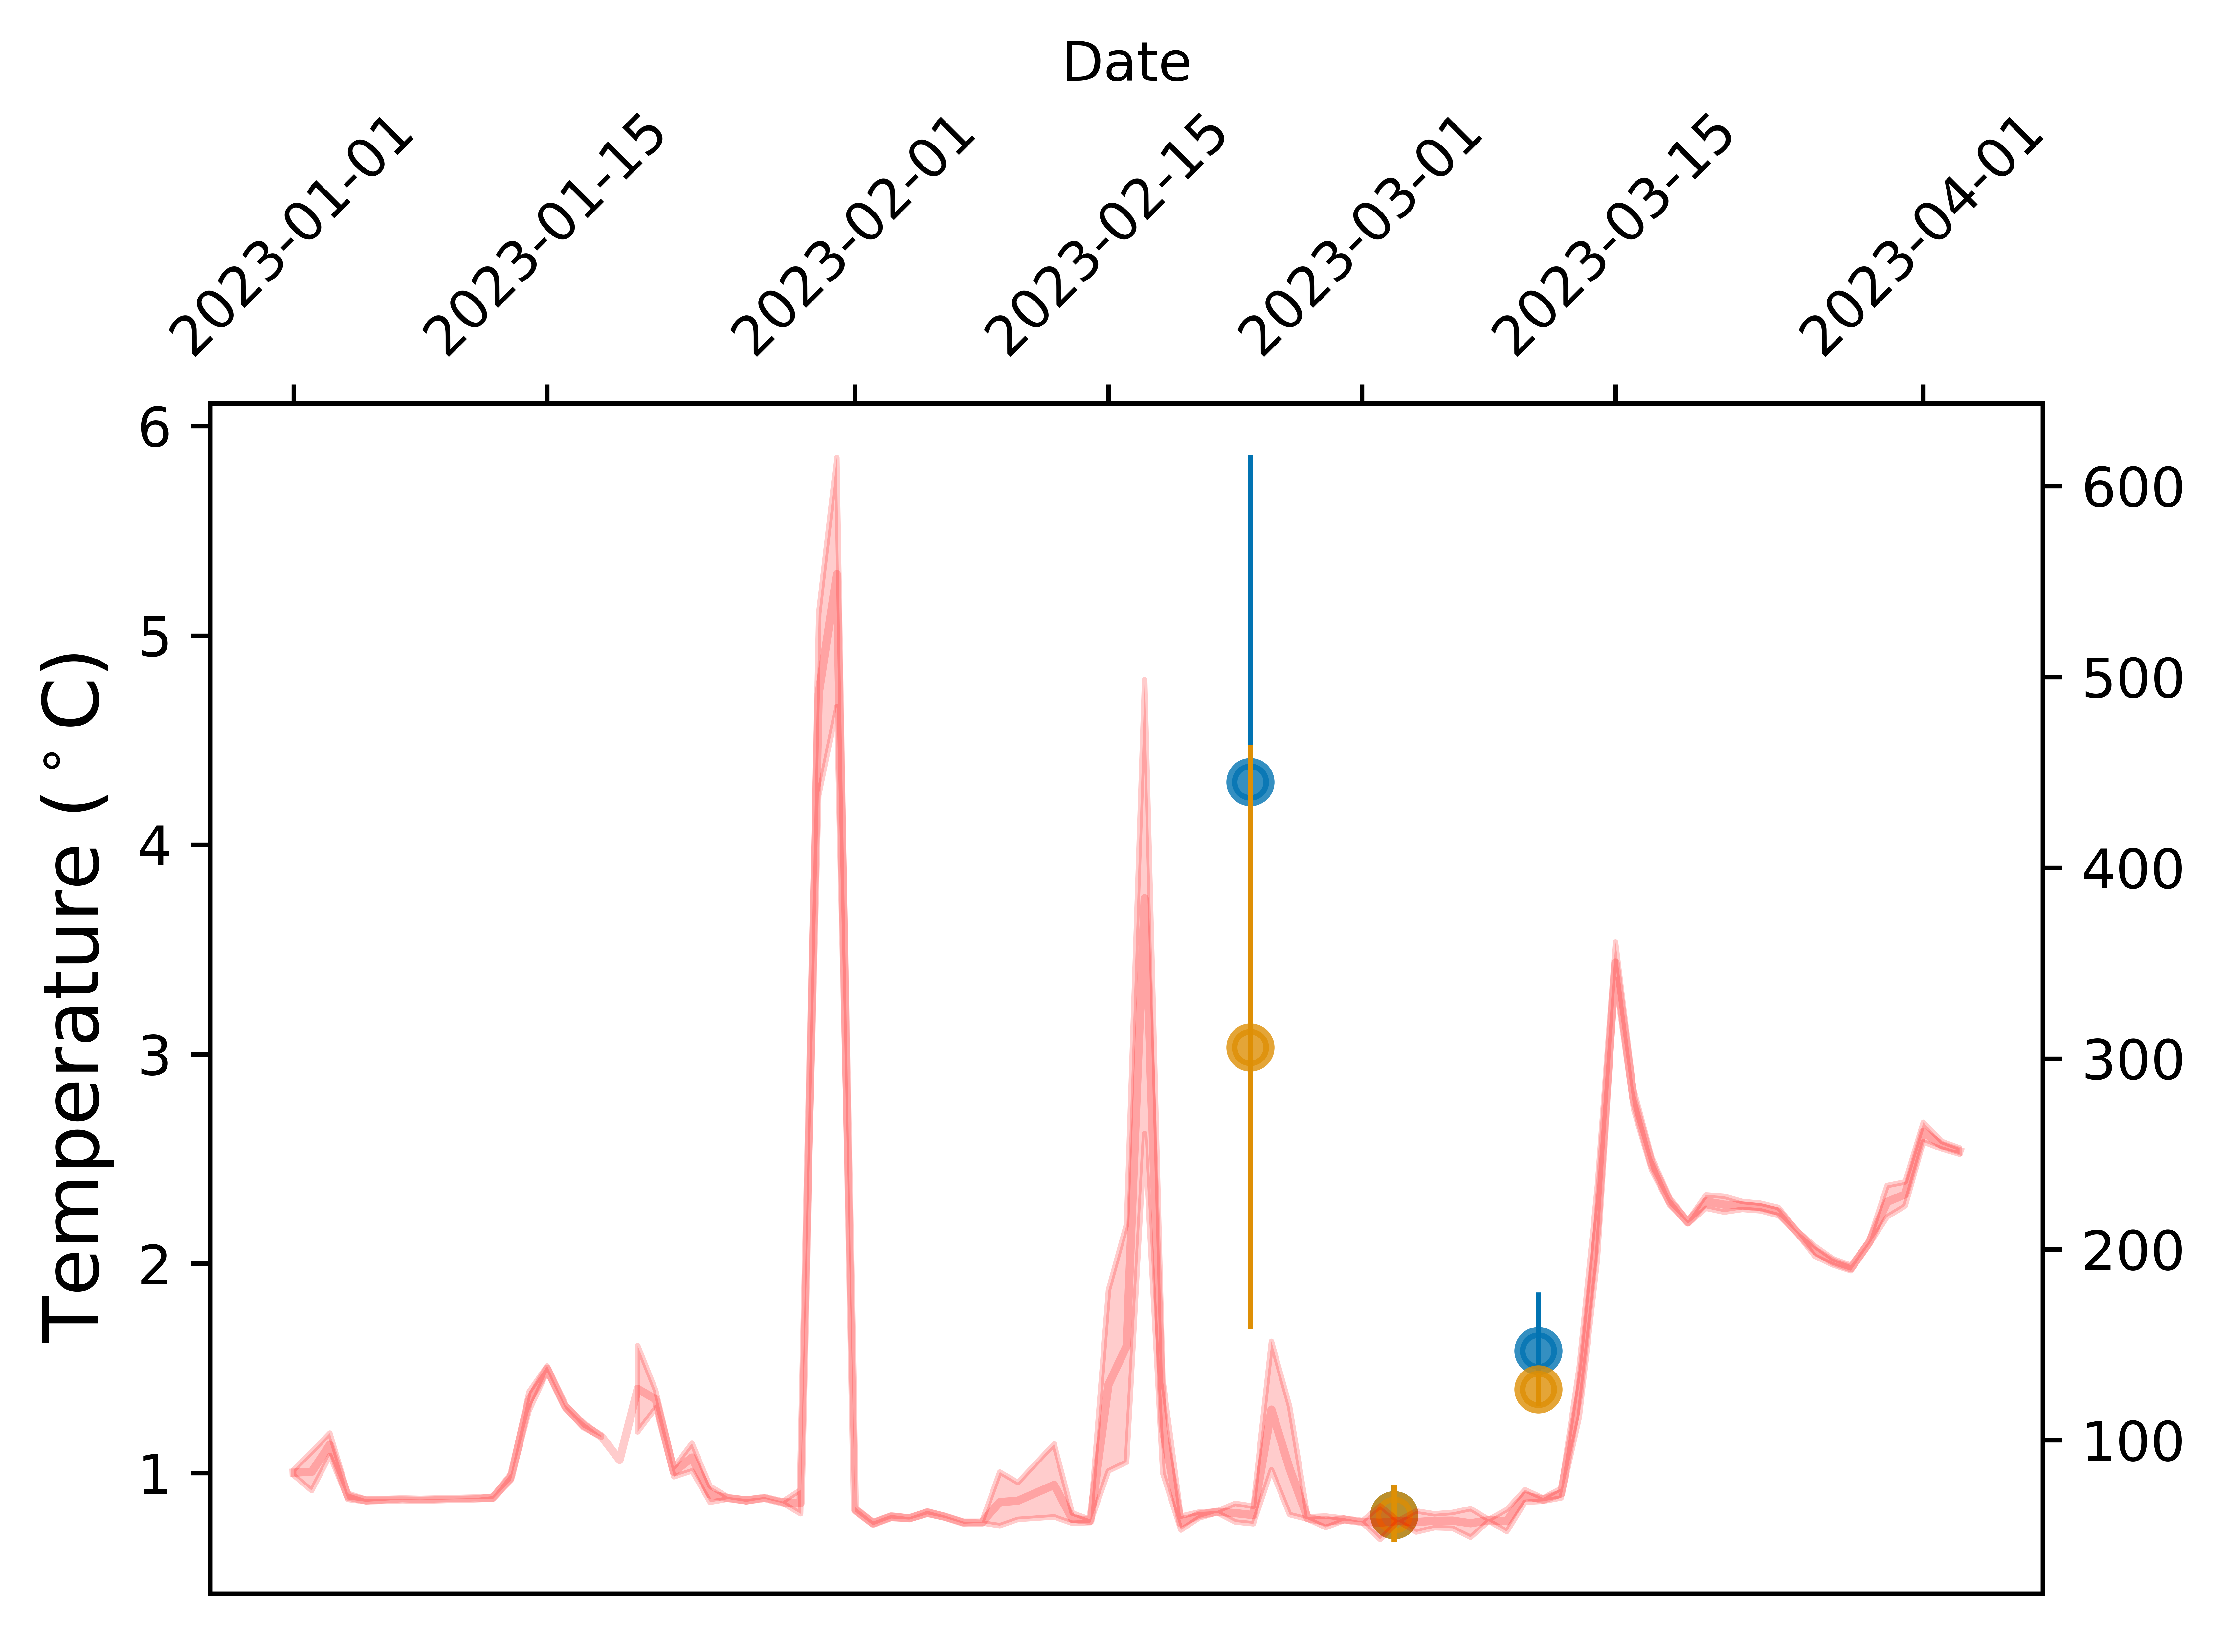

In [233]:
# make pointplot of temp data above and below the dam 
PLOT2 = sns.pointplot(data=discharge_df, x="Date", y= 'Temp_C', errwidth = 1, hue = 'Above or Below Dam', palette = 'colorblind', join = False, legend = False)

# change transparency of points
plt.setp(PLOT2.collections, alpha=.8)

# angle dates 
plt.xticks(rotation = 45)

# hide messed up dates 
PLOT2.axes.get_xaxis().set_visible(False)

# label temp y axis
PLOT2.set_ylabel("Temperature ($^\circ$C)", fontsize = 14)
PLOT2.get_legend().remove()

# make second y axis for discharge and second x axis for correct dates
ax2 = plt.twinx()
ax3 = plt.twiny()

# make line plot of discharge data
PLOT = sns.lineplot(data = discharge_df, x = 'Date', y = 'Discharge-L/s', color = 'red', alpha = 0.2, label = 'Discharge', legend = False)

# angle dates 
plt.xticks(rotation = 45)

# label discharge y axis (doesn't work, not sure why)
ax3.set_ylabel("Discharge (L/s)", fontsize = 14)





# EC Above and Below Dam

C:\Users\ANGELASEIBERT\Anaconda3\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.00392156862745098, 0.45098039215686275, 0.6980392156862745)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
C:\Users\ANGELASEIBERT\Anaconda3\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.8705882352941177, 0.5607843137254902, 0.0196078431372549)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


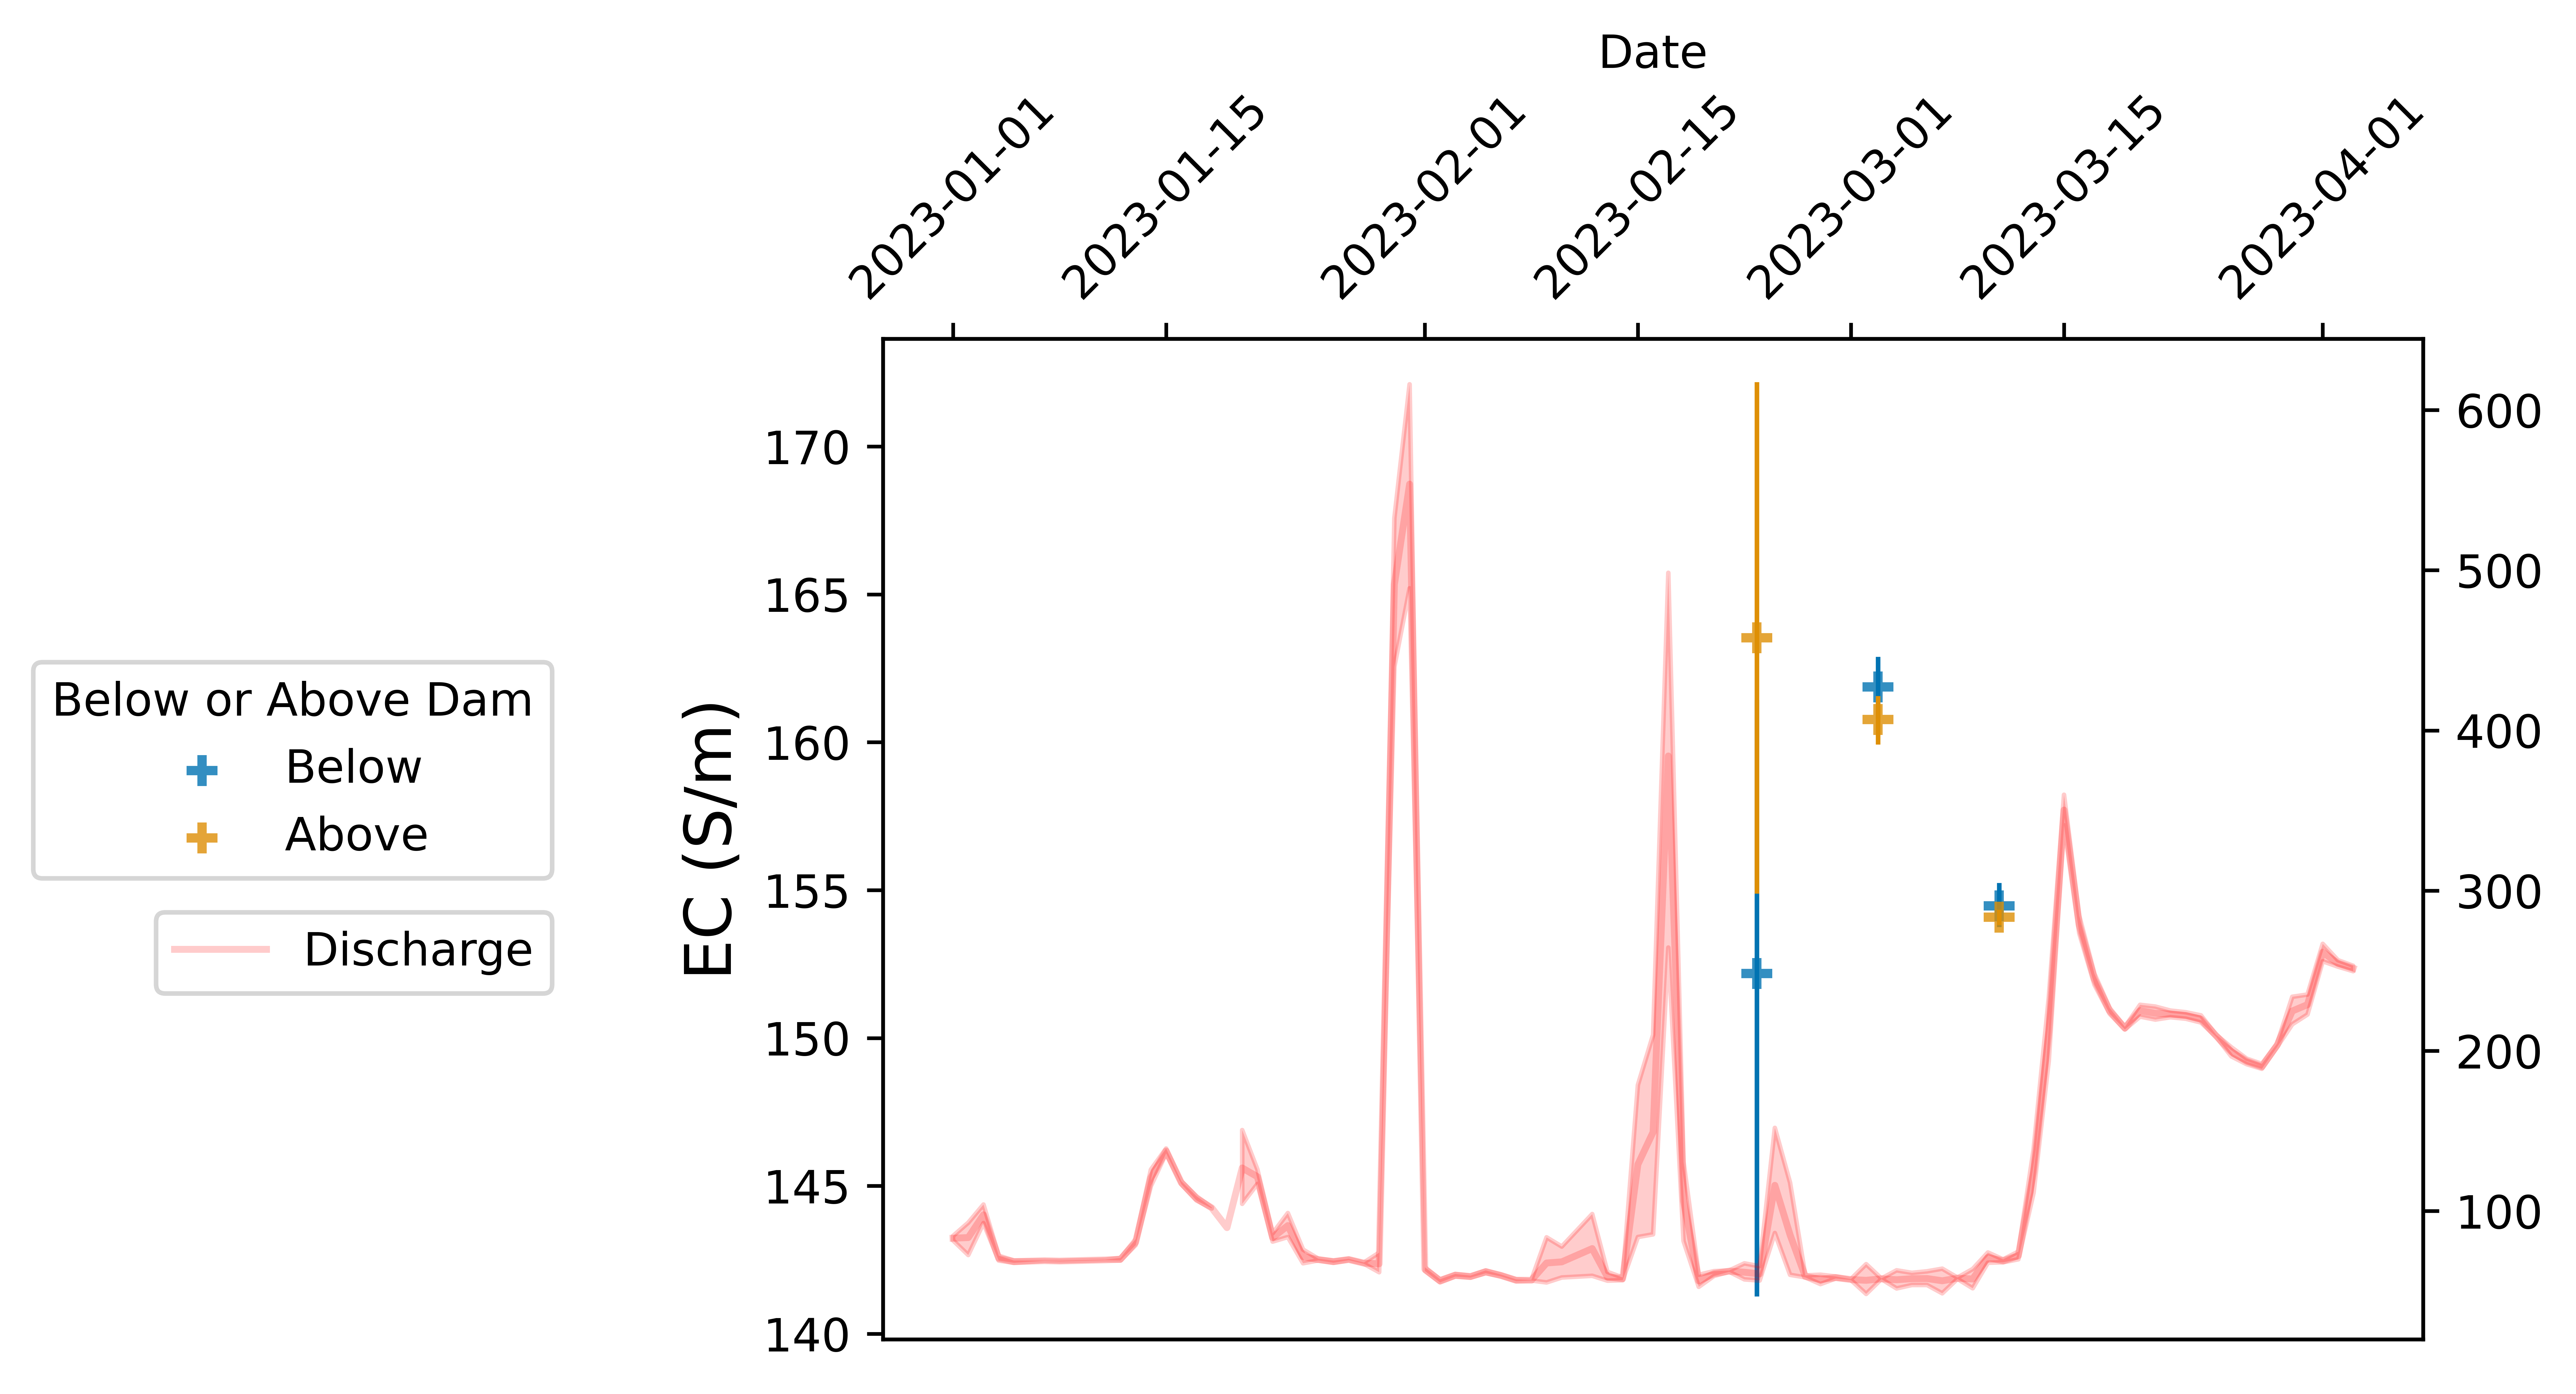

In [235]:
# make pointplot of EC data above and below the dam 
PLOT2 = sns.pointplot(data=discharge_df, x="Date", y= 'EC', markers = '+', errwidth = 1, hue = 'Above or Below Dam', palette = 'colorblind', join = False)

# change transparency of points
plt.setp(PLOT2.collections, alpha=.8)

# angle dates 
plt.xticks(rotation = 45)

# hide messed up dates 
PLOT2.axes.get_xaxis().set_visible(False)

# label temp y axis
PLOT2.set_ylabel("EC (S/m)", fontsize = 14)

# title legend
plt.legend(title = 'Below or Above Dam', bbox_to_anchor = (-0.2,0.7))

# make second y axis for discharge and second x axis for correct dates
ax2 = plt.twinx()
ax3 = plt.twiny()

# make line plot of discharge data
PLOT = sns.lineplot(data = discharge_df, x = 'Date', y = 'Discharge-L/s', color = 'red', alpha = 0.2, label = 'Discharge')

# angle dates 
plt.xticks(rotation = 45)

# label discharge y axis (doesn't work, not sure why)
ax3.set_ylabel("Discharge (L/s)", fontsize = 14)

# set discharge legend
plt.legend(bbox_to_anchor = (-0.2,0.45))

# NOx Above and Below Dam

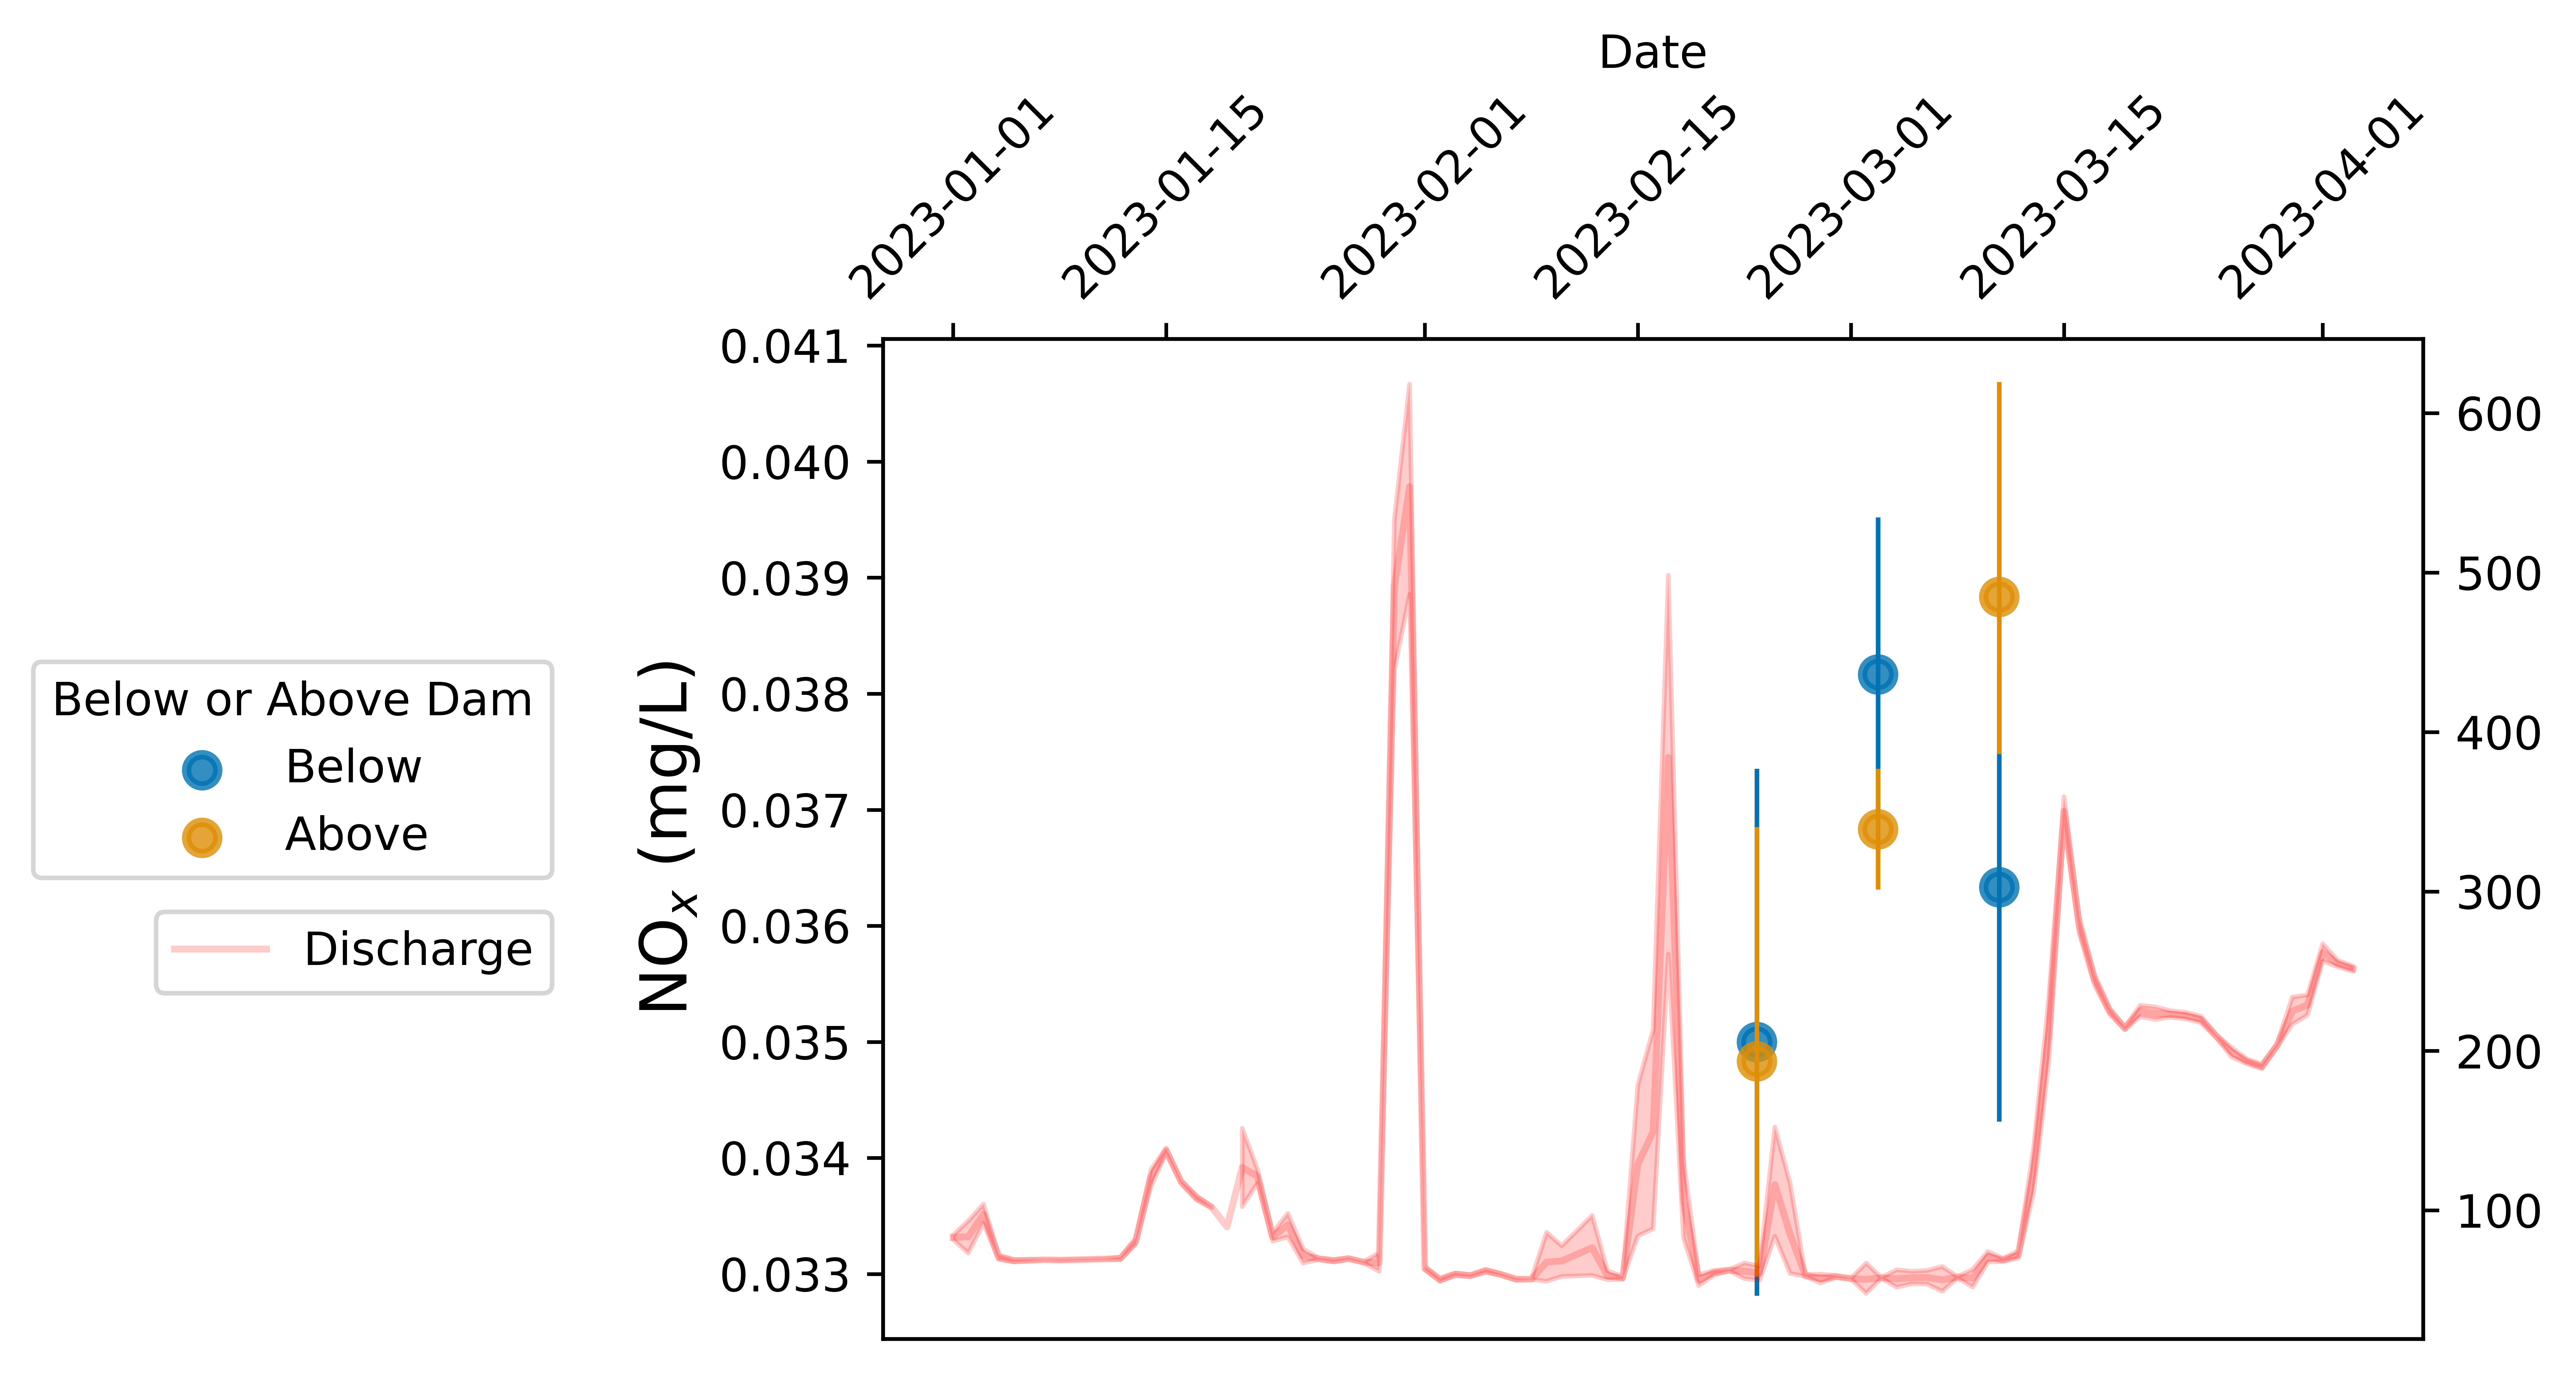

In [234]:
# make pointplot of EC data above and below the dam 
PLOT2 = sns.pointplot(data=discharge_df, x="Date", y= 'NOx', errwidth = 1, hue = 'Above or Below Dam', palette = 'colorblind', join = False)

# change transparency of points
plt.setp(PLOT2.collections, alpha=.8)

# angle dates 
plt.xticks(rotation = 45)

# hide messed up dates 
PLOT2.axes.get_xaxis().set_visible(False)

# label temp y axis
PLOT2.set_ylabel("NO${}_x$ (mg/L)", fontsize = 14)

# title legend
plt.legend(title = 'Below or Above Dam', bbox_to_anchor = (-0.2,0.7))

# make second y axis for discharge and second x axis for correct dates
ax2 = plt.twinx()
ax3 = plt.twiny()

# make line plot of discharge data
PLOT = sns.lineplot(data = discharge_df, x = 'Date', y = 'Discharge-L/s', color = 'red', alpha = 0.2, label = 'Discharge')

# angle dates 
plt.xticks(rotation = 45)

# label discharge y axis (doesn't work, not sure why)
ax3.set_ylabel("Discharge (L/s)", fontsize = 14)

# set discharge legend
plt.legend(bbox_to_anchor = (-0.2,0.45))

# PO4 Above and Below Dam

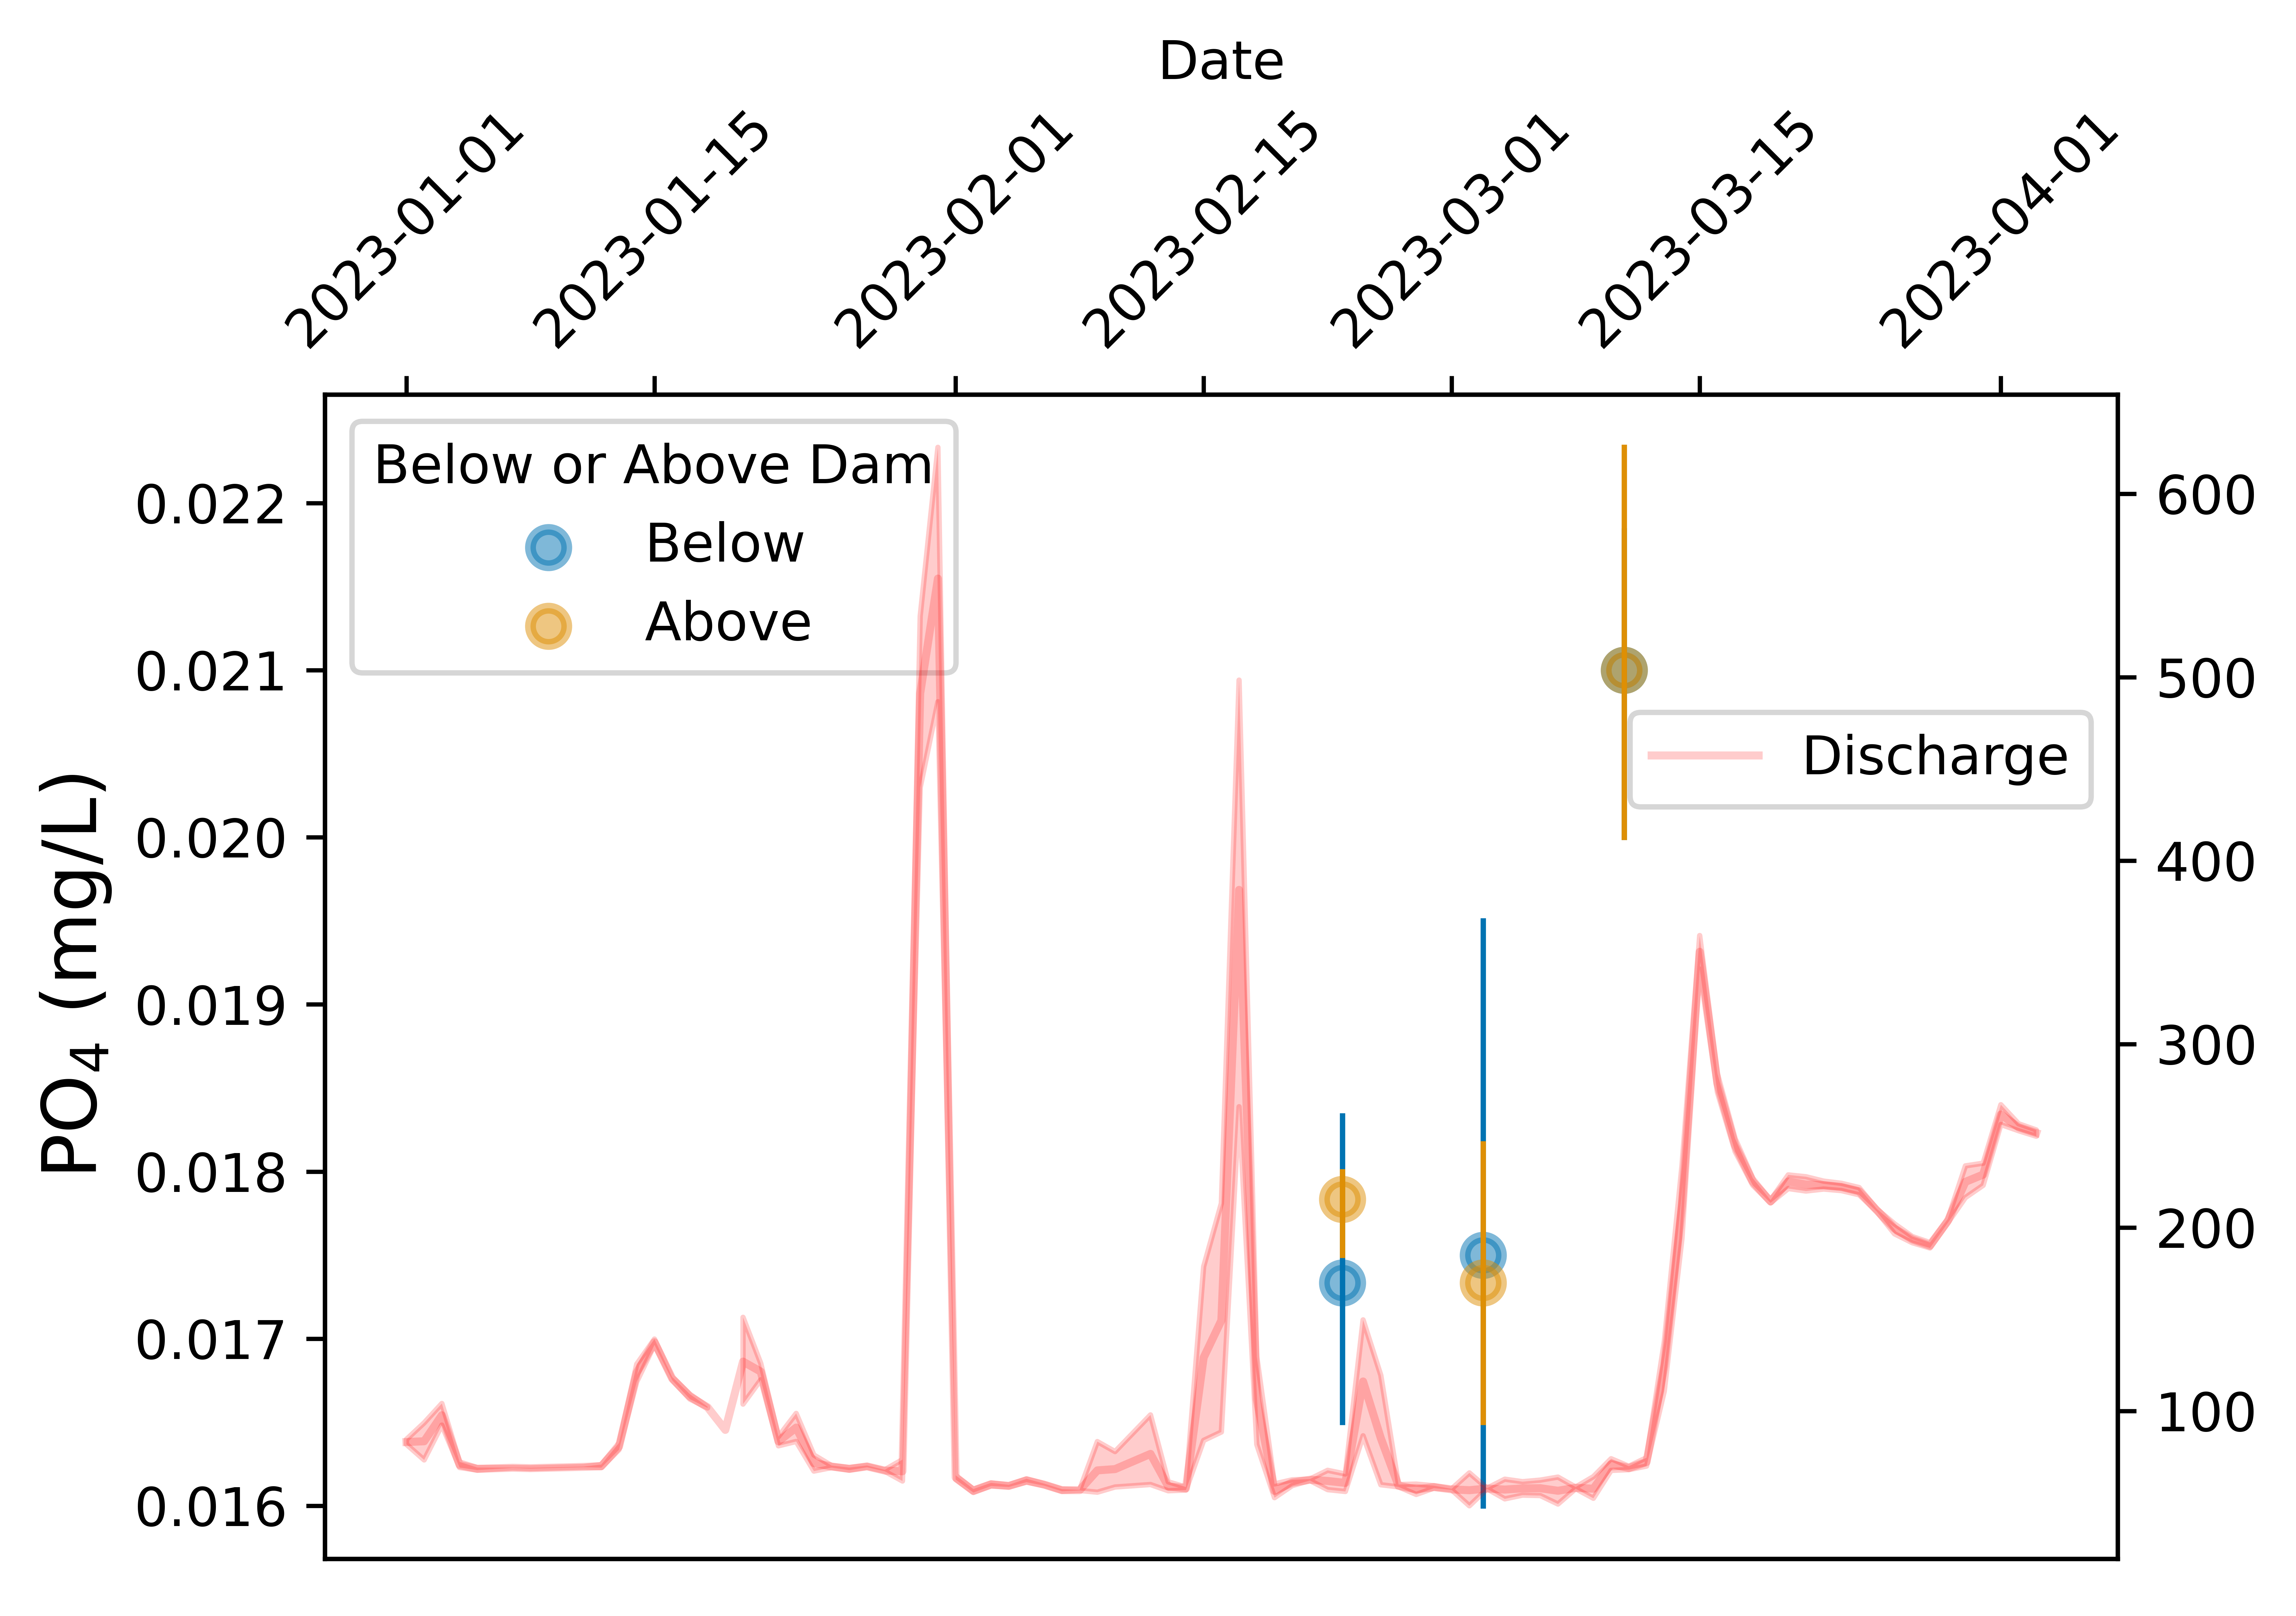

In [214]:
# make pointplot of EC data above and below the dam 
PLOT2 = sns.pointplot(data=discharge_df, x="Date", y= 'PO4', errwidth = 1, hue = 'Above or Below Dam', palette = 'colorblind', join = False)

# change transparency of points
plt.setp(PLOT2.collections, alpha=.5)

# angle dates 
plt.xticks(rotation = 45)

# hide messed up dates 
PLOT2.axes.get_xaxis().set_visible(False)

# label temp y axis
PLOT2.set_ylabel("PO${}_4$ (mg/L)", fontsize = 14)

# title legend
plt.legend(title = 'Below or Above Dam')

# make second y axis for discharge and second x axis for correct dates
ax2 = plt.twinx()
ax3 = plt.twiny()

# make line plot of discharge data
PLOT = sns.lineplot(data = discharge_df, x = 'Date', y = 'Discharge-L/s', color = 'red', alpha = 0.2, label = 'Discharge')

# angle dates 
plt.xticks(rotation = 45)

# label discharge y axis (doesn't work, not sure why)
ax3.set_ylabel("Discharge (L/s)", fontsize = 14)

# set discharge legend
plt.legend(loc='upper right', bbox_to_anchor = (1,0.75))

# NH3 Upper Dam

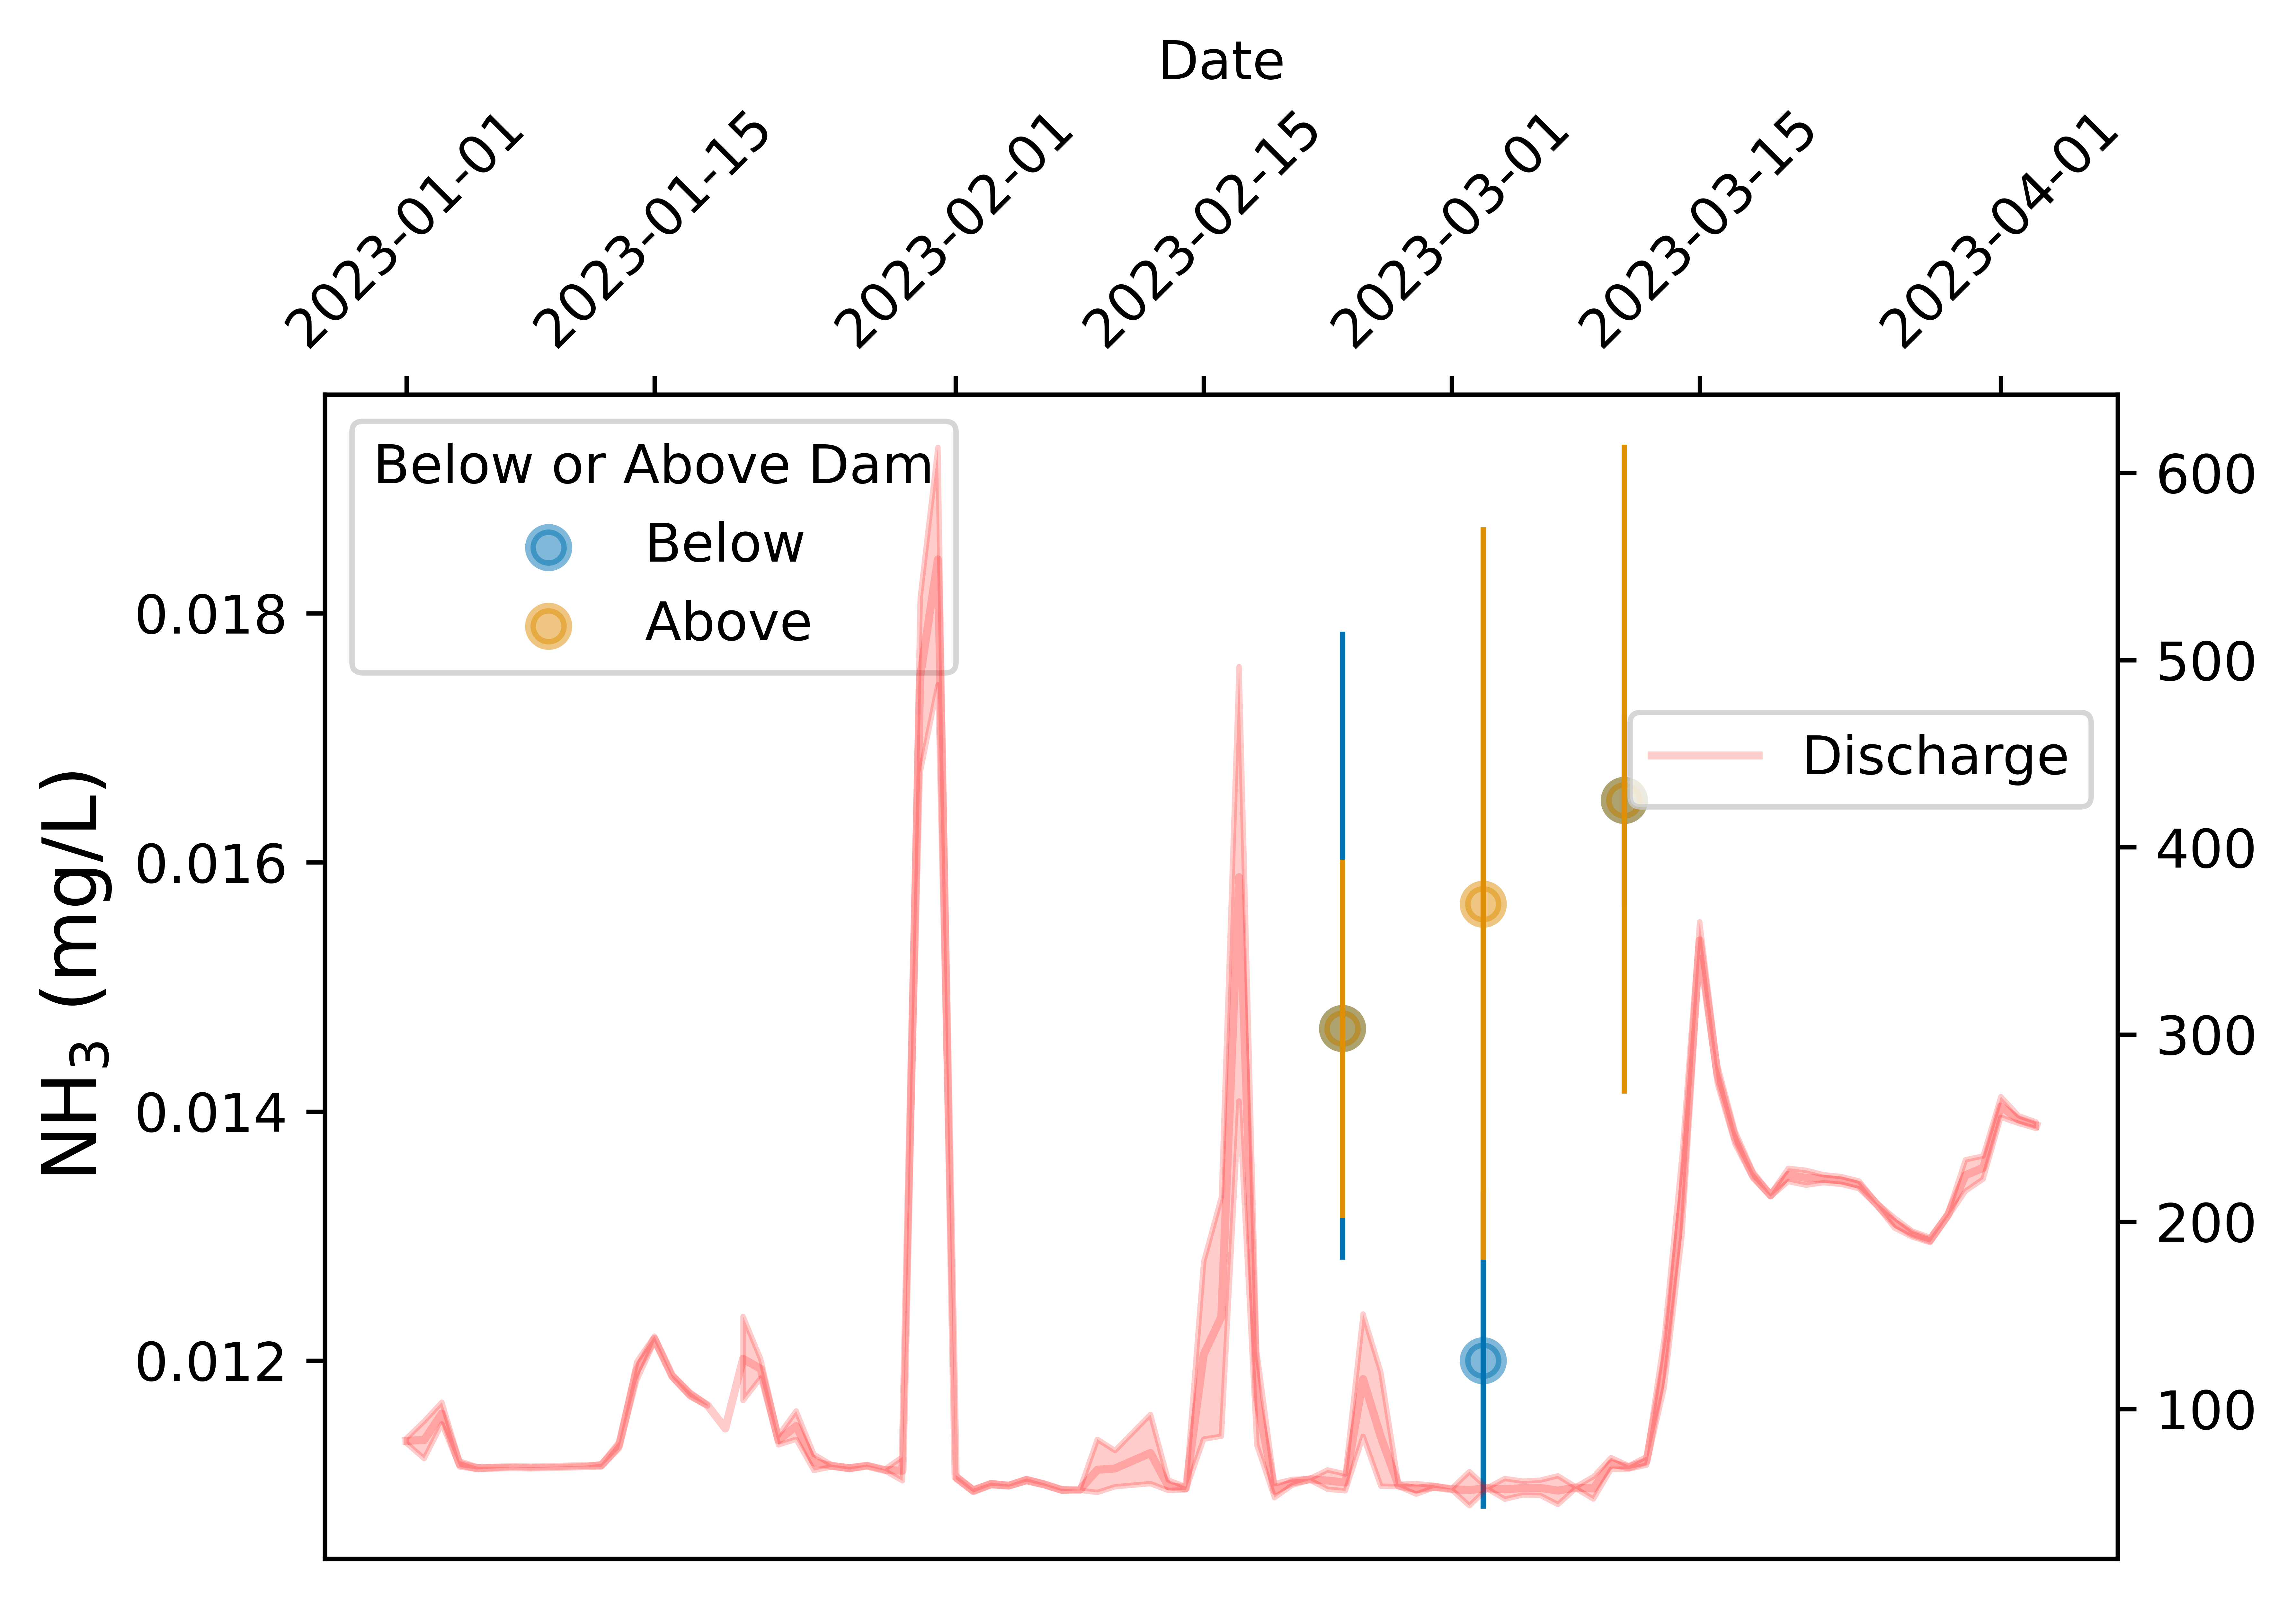

In [215]:
# make pointplot of EC data above and below the dam 
PLOT2 = sns.pointplot(data=discharge_df, x="Date", y= 'NH3', errwidth = 1, hue = 'Above or Below Dam', palette = 'colorblind', join = False)

# change transparency of points
plt.setp(PLOT2.collections, alpha=.5)

# angle dates 
plt.xticks(rotation = 45)

# hide messed up dates 
PLOT2.axes.get_xaxis().set_visible(False)

# label temp y axis
PLOT2.set_ylabel("NH${}_3$ (mg/L)", fontsize = 14)

# title legend
plt.legend(title = 'Below or Above Dam')

# make second y axis for discharge and second x axis for correct dates
ax2 = plt.twinx()
ax3 = plt.twiny()

# make line plot of discharge data
PLOT = sns.lineplot(data = discharge_df, x = 'Date', y = 'Discharge-L/s', color = 'red', alpha = 0.2, label = 'Discharge')

# angle dates 
plt.xticks(rotation = 45)

# label discharge y axis (doesn't work, not sure why)
ax3.set_ylabel("Discharge (L/s)", fontsize = 14)

# set discharge legend
plt.legend(loc='upper right', bbox_to_anchor = (1,0.75))

# Temp Lower Dam

In [ ]:
# generate scatter and line plot of water qual data 
sns.scatterplot(data=WQ_df_lower, x="Date", y= 'Temp_C', markers = 'o', hue = 'Site_Information', palette = 'colorblind', legend = False)
line_plot = sns.lineplot(data=WQ_df_lower, x="Date", y= 'Temp_C', err_style = 'bars', linestyle = 'dashed', hue = 'Site_Information', palette = 'colorblind')

# set x and y label
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Temperature ($^\circ$C)", fontsize = 14)

# set y axis range
line_plot.set_ylim(0, 10)

# generate legend elemets so line style will display
legend_elements = [Line2D([0], [0], color = (0.00392156862745098, 0.45098039215686275, 0.6980392156862745), linestyle = 'dashed', label='Below Confluence'), 
                  Line2D([0], [0], color = (0.8705882352941177, 0.5607843137254902, 0.0196078431372549), linestyle = 'dashed', label='Main Channel'), 
                  Line2D([0], [0], color = (0.00784313725490196, 0.6196078431372549, 0.45098039215686275), linestyle = 'dashed', label='Pool'),
                  Line2D([0], [0], color = (0.8352941176470589, 0.3686274509803922, 0.0), linestyle = 'dashed', label='Side Channel')]

# display legend
plt.legend(handles = legend_elements, title='Lower Dam Feature', loc='upper left', bbox_to_anchor = (-0.55,0.6))

# set second y axis for discharge data 
ax2 = plt.twinx()

# generate scatter and line plot
line_plot2 = sns.lineplot(data=discharge_low, x="Date", y= 'q', hue = 'ID', palette = 'rocket', linestyle = '--', err_style = 'bars', legend = True)
sns.scatterplot(data=discharge_low, x="Date", y= 'q', marker = '+', hue = 'ID', palette = 'rocket', legend = False)

# set y axis range
line_plot2.set_ylim(25, 40)

# generate legend elements so line style will display
legend_elements2 = [Line2D([0], [0], color = (0.67824099, 0.09192342, 0.3504148), linestyle = 'dashed', label = 'Low Main')]

# set y label
plt.ylabel("Discharge (L/s)", font = 'arial', fontsize = 14)

# display legend
plt.legend(handles = legend_elements2, title='Discharge', loc='upper left',  bbox_to_anchor = (-0.42,0.2));


# EC Lower Dam

In [ ]:
sns.scatterplot(data=WQ_df_lower, x="Date", y= 'EC', marker = 'X', hue = 'Site_Information', palette = 'colorblind', legend = False)
line_plot1 = sns.lineplot(data=WQ_df_lower, x="Date", y= 'EC', hue = 'Site_Information', err_style = 'bars', linestyle = 'dashed', palette = 'colorblind', legend = False)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("EC (S/m)", fontsize = 14);
line_plot1.set_ylim(125, 190)


ax2 = plt.twinx()
line_plot2 = sns.lineplot(data=discharge_low, x="Date", y= 'q', hue = 'ID', palette = 'rocket', linestyle = '--', err_style = 'bars', legend = False)
sns.scatterplot(data=discharge_low, x="Date", y= 'q', marker = '+', hue = 'ID', palette = 'rocket', legend = False)
line_plot2.set_ylim(25, 40)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Discharge (L/s)", fontsize = 14);

# NOx Lower Dam

In [ ]:
sns.scatterplot(data=WQ_df_lower, x="Date", y= 'NOx_mgL', marker = '^', hue = 'Site_Information', palette = 'colorblind', legend = False)
line_plotNo2 = sns.lineplot(data=WQ_df_lower, x="Date", y= 'NOx_mgL', hue = 'Site_Information',err_style = 'bars', palette = 'colorblind', linestyle = 'dashed', legend = False)

legend_elements = [Line2D([0], [0], color = (0.00392156862745098, 0.45098039215686275, 0.6980392156862745), linestyle = 'dashed', label='Below Confluence'), 
                  Line2D([0], [0], color = (0.8705882352941177, 0.5607843137254902, 0.0196078431372549), linestyle = 'dashed', label='Main Channel'), 
                  Line2D([0], [0], color = (0.00784313725490196, 0.6196078431372549, 0.45098039215686275), linestyle = 'dashed', label='Pool'),
                  Line2D([0], [0], color = (0.8352941176470589, 0.3686274509803922, 0.0), linestyle = 'dashed', label='Side Channel')]

plt.legend(handles = legend_elements, title='Lower Dam Feature', loc='upper left', bbox_to_anchor = (-0.6,0.7))


plt.xlabel("Date", fontsize = 14)
plt.ylabel("NO${}_x$ (mg/L)", fontsize = 14);

line_plotNo2.set_ylim(0.03, 0.045)


ax2 = plt.twinx()
line_plot2 = sns.lineplot(data=discharge_low, x="Date", y= 'q', hue = 'ID', palette = 'rocket', linestyle = '--', err_style = 'bars', legend = True)
sns.scatterplot(data=discharge_low, x="Date", y= 'q', marker = '+', hue = 'ID', palette = 'rocket', legend = False)
line_plot2.set_ylim(25, 40)

legend_elements2 = [Line2D([0], [0], color = (0.67824099, 0.09192342, 0.3504148), linestyle = 'dashed', label = 'Low Main')]

plt.ylabel("Discharge (L/s)", font = 'arial', fontsize = 14);
plt.legend(handles = legend_elements2, title='Discharge', loc='right',  bbox_to_anchor = (-0.2,0.2));



# PO4 Lower Dam

In [ ]:
sns.scatterplot(data=WQ_df_lower, x="Date", y= 'PO4_mgL', marker = 'D', hue = 'Site_Information', palette = 'colorblind', legend = False)
lineplotpo = sns.lineplot(data=WQ_df_lower, x="Date", y= 'PO4_mgL', hue = 'Site_Information', linestyle = 'dashed', err_style = 'bars', palette = 'colorblind', legend = False)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("PO${}_4$ (mg/L)", fontsize = 14);
lineplotpo.set_ylim(0.01, 0.025)


ax2 = plt.twinx()
line_plot2 = sns.lineplot(data=discharge_low, x="Date", y= 'q', hue = 'ID', palette = 'rocket', linestyle = '--', err_style = 'bars', legend = False)
sns.scatterplot(data=discharge_low, x="Date", y= 'q', marker = '+', hue = 'ID', palette = 'rocket', legend = False)
line_plot2.set_ylim(25, 40)


plt.ylabel("Discharge (L/s)", font = 'arial', fontsize = 14);


# NH3 Lower Dam

In [ ]:
sns.scatterplot(data=WQ_df_lower, x="Date", y= 'NH4', marker = 'P', hue = 'Site_Information', palette = 'colorblind', legend = False)
lpnh = sns.lineplot(data=WQ_df_lower, x="Date", y= 'NH4', hue = 'Site_Information', err_style = 'bars', linestyle = 'dashed', palette = 'colorblind', legend = False)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("NH${}_3$ (mg/L)", fontsize = 14);
lpnh.set_ylim(0.01, 0.0225)


ax2 = plt.twinx()
line_plot2 = sns.lineplot(data=discharge_low, x="Date", y= 'q', hue = 'ID', palette = 'rocket', linestyle = '--', err_style = 'bars', legend = False)
sns.scatterplot(data=discharge_low, x="Date", y= 'q', marker = '+', hue = 'ID', palette = 'rocket', legend = False)
line_plot2.set_ylim(25, 40)


plt.ylabel("Discharge (L/s)", font = 'arial', fontsize = 14);